In [1]:
import pyreadstat

In [2]:
# Utilisez pyreadstat pour lire le fichier SAS
dataframe_sas, meta = pyreadstat.read_sas7bdat('../data/base_finale_cible_2.sas7bdat')

# Afficher le DataFrame résultant
print(dataframe_sas)

            date cible_2     NUMTECPRS  Engagement_prorat CODNAF2  \
0       202201.0       0  9.100000e+02            1245.71   4772A   
1       202201.0       0  1.570800e+04           22453.26   4711B   
2       202201.0       0  3.075800e+04           12770.09   8623Z   
3       202201.0       0  6.949600e+04          114002.53   8623Z   
4       202201.0       0  8.736000e+04           12970.63   4789Z   
...          ...     ...           ...                ...     ...   
596047  202212.0       1  1.341477e+11              67.02   4759B   
596048  202212.0       1  1.341632e+11              36.49   8623Z   
596049  202212.0       1  1.342214e+11               3.43   8690F   
596050  202212.0       1  1.342678e+11            6957.06   6910Z   
596051  202212.0       1  1.343004e+11              59.77   8121Z   

                     SEC_DER COULEUR_PART_M COULEUR_PART_MM3_M   AGE  \
0       Comm détail non alim           Vert          Vert_Vert  64.0   
1           Comm détail ali

In [ ]:
dataframe_sas.shape

(596052, 185)

In [ ]:
dataframe_sas.columns.tolist()

['date',
 'cible_2',
 'NUMTECPRS',
 'Engagement_prorat',
 'CODNAF2',
 'SEC_DER',
 'COULEUR_PART_M',
 'COULEUR_PART_MM3_M',
 'AGE',
 'CODETAJUR',
 'CODTYPPRS',
 'LIBCSPCMP',
 'NBOPECAR',
 'NBOPECARGLISS_M12',
 'MNTOPECAR',
 'NBPMTCAR',
 'NBPMTCARGLISS_M12',
 'MNTPMTCAR',
 'NBRETCAR',
 'NBRETCARGLISS_M12',
 'MNTRETCAR',
 'NBECRCRD',
 'MNTECRCRD',
 'NBECRDBT',
 'MNTECRDBT',
 'NBVIRPONEMI',
 'NBVIRPONEMIGLISS_M12',
 'MNTVIRPONEMI',
 'NBCHQEMI',
 'NBCHQEMIGLISS_M12',
 'MNTCHQEMI',
 'NBPLV',
 'MNTPLV',
 'NBVIRPONRCP',
 'MNTVIRPONRCP',
 'NBVIRPEREMI',
 'MNTVIRPEREMI',
 'MNTTOTMVTAFF',
 'MNTTOTMVTAFFGLISS_M12',
 'MNTECSCPTEPA',
 'NBECRCRD_mm1',
 'MNTECRCRD_mm1',
 'NBECRDBT_mm1',
 'MNTECRDBT_mm1',
 'NBPLV_mm1',
 'MNTPLV_mm1',
 'MNTTOTMVTAFF_mm1',
 'MNTTOTMVTAFFGLISS_M12_mm1',
 'NBECRCRD_mm3',
 'MNTECRCRD_mm3',
 'NBECRDBT_mm3',
 'MNTECRDBT_mm3',
 'NBPLV_mm3',
 'MNTPLV_mm3',
 'MNTTOTMVTAFF_mm3',
 'MNTTOTMVTAFFGLISS_M12_mm3',
 'NBECRCRD_mm12',
 'MNTECRCRD_mm12',
 'NBECRDBT_mm12',
 'MNTECRDBT_mm12'

In [ ]:
dataframe_sas.NUMTECPRS

0         9.100000e+02
1         1.570800e+04
2         3.075800e+04
3         6.949600e+04
4         8.736000e+04
              ...     
596047    1.341477e+11
596048    1.341632e+11
596049    1.342214e+11
596050    1.342678e+11
596051    1.343004e+11
Name: NUMTECPRS, Length: 596052, dtype: float64

Le doublon (date,NUMTECPRS) est la clée primaire de la table on va vérifier qu'il n'y est pas de doublons.

In [ ]:
# Vérifiez les duplications pour la combinaison (date, NUMTECPRS)
duplications_cle_primaire = dataframe_sas.duplicated(subset=['date', 'NUMTECPRS'])

# Affichez le nombre total de duplications pour la clé primaire
print(f'Nombre total de doublons pour la clé primaire : {duplications_cle_primaire.sum()}')

Nombre total de doublons pour la clé primaire : 0


Les clients sont identifiés avec la variable NUMTECPRS, on va chercher combien il y a de clients différents.

In [ ]:
# Obtenez le nombre de clients différents
nombre_clients_differents = dataframe_sas['NUMTECPRS'].nunique()

# Affichez le nombre de clients différents
print(f'Nombre de clients différents : {nombre_clients_differents}')

Nombre de clients différents : 144411


In [ ]:
# Obtenez une liste des variables quantitatives
list_variables_quantitatives = dataframe_sas.select_dtypes(include=['number']).columns.tolist()

# Affichez les listes de variables
print('Variables quantitatives :', list_variables_quantitatives)
len(list_variables_quantitatives)

Variables quantitatives : ['date', 'NUMTECPRS', 'Engagement_prorat', 'AGE', 'NBOPECAR', 'NBOPECARGLISS_M12', 'MNTOPECAR', 'NBPMTCAR', 'NBPMTCARGLISS_M12', 'MNTPMTCAR', 'NBRETCAR', 'NBRETCARGLISS_M12', 'MNTRETCAR', 'NBECRCRD', 'MNTECRCRD', 'NBECRDBT', 'MNTECRDBT', 'NBVIRPONEMI', 'NBVIRPONEMIGLISS_M12', 'MNTVIRPONEMI', 'NBCHQEMI', 'NBCHQEMIGLISS_M12', 'MNTCHQEMI', 'NBPLV', 'MNTPLV', 'NBVIRPONRCP', 'MNTVIRPONRCP', 'NBVIRPEREMI', 'MNTVIRPEREMI', 'MNTTOTMVTAFF', 'MNTTOTMVTAFFGLISS_M12', 'MNTECSCPTEPA', 'NBECRCRD_mm1', 'MNTECRCRD_mm1', 'NBECRDBT_mm1', 'MNTECRDBT_mm1', 'NBPLV_mm1', 'MNTPLV_mm1', 'MNTTOTMVTAFF_mm1', 'MNTTOTMVTAFFGLISS_M12_mm1', 'NBECRCRD_mm3', 'MNTECRCRD_mm3', 'NBECRDBT_mm3', 'MNTECRDBT_mm3', 'NBPLV_mm3', 'MNTPLV_mm3', 'MNTTOTMVTAFF_mm3', 'MNTTOTMVTAFFGLISS_M12_mm3', 'NBECRCRD_mm12', 'MNTECRCRD_mm12', 'NBECRDBT_mm12', 'MNTECRDBT_mm12', 'NBPLV_mm12', 'MNTPLV_mm12', 'MNTTOTMVTAFF_mm12', 'MNTTOTMVTAFFGLISS_M12_mm12', 'NBJ_ARR', 'IMPAYE', 'DEPASSEMENT', 'NBJ_ARR_mm1', 'NBJ_ARR_mm1

153

In [ ]:
# Obtenez une liste des variables qualitatives
list_variables_qualitatives = dataframe_sas.select_dtypes(include=['object']).columns.tolist()

print('Variables qualitatives :', list_variables_qualitatives)
len(list_variables_qualitatives)

Variables qualitatives : ['cible_2', 'CODNAF2', 'SEC_DER', 'COULEUR_PART_M', 'COULEUR_PART_MM3_M', 'CODETAJUR', 'CODTYPPRS', 'LIBCSPCMP', 'Type_fdc_dm', 'cible_1', 'cible_3', 'CHR_USAGE_NDB_V1_4', 'CHR_USAGE_mm1', 'CHR_USAGE_mm3', 'CHR_USAGE_mm6', 'CODACVPRO', 'COULEUR_IRPRO', 'COULEUR_IRPRO_mm1', 'Degra_IRPRO_1pt_par_2m', 'Degra_IRPRO_2pt_par_2m', 'Degra_IRPRO_continue_3dm', 'Degra_IRPRO_mm1', 'Degra_IRPRO_mm3', 'Degra_couleur_IRPRO_mm1', 'INDDBLRLNPAR', 'INDRSKITDBDF', 'IRPRO_rouge_3dm', 'NDB_12dm', 'NDB_6dm', 'NDB_3dm', 'TOP_SCI', 'classe_finale_NDB']


32

In [ ]:
dataframe_sas[list_variables_qualitatives].head(5)

,cible_2,CODNAF2,SEC_DER,COULEUR_PART_M,COULEUR_PART_MM3_M,CODETAJUR,CODTYPPRS,LIBCSPCMP,Type_fdc_dm,cible_1,...,Degra_IRPRO_mm3,Degra_couleur_IRPRO_mm1,INDDBLRLNPAR,INDRSKITDBDF,IRPRO_rouge_3dm,NDB_12dm,NDB_6dm,NDB_3dm,TOP_SCI,classe_finale_NDB
0,0,4772A,Comm détail non alim,Vert,Vert_Vert,1200,EI,COMMERCANTE,4- Aucun FDC spécifique,0,...,0,0,2,0,0,0,0,0,0,1
1,0,4711B,Comm détail alim,Vert,Vert_Vert,1200,EI,COMMERCANT,4- Aucun FDC spécifique,0,...,*,0,2,0,0,0,0,0,0,5
2,0,8623Z,Pro lib santé,Vert,Vert_Vert,1500,EI,CHIRURGIEN DENTISTE,4- Aucun FDC spécifique,0,...,0,0,2,0,0,0,0,0,0,1
3,0,8623Z,Pro lib santé,Vert,Vert_Vert,1500,EI,CHIRURGIEN DENTISTE,4- Aucun FDC spécifique,0,...,0,0,2,0,0,0,0,0,0,1
4,0,4789Z,Comm détail non alim,Vert,Vert_Vert,1200,EI,MARCHAND AMBULANT,4- Aucun FDC spécifique,0,...,0,0,2,0,0,0,0,0,0,2


In [ ]:
# Obtenez les valeurs uniques de la variable cible_2
valeurs_uniques_cible_2 = dataframe_sas['cible_2'].unique()

# Affichez les valeurs uniques
print('Valeurs uniques de cible_2 :', valeurs_uniques_cible_2)

Valeurs uniques de cible_2 : ['0' '1']


Analyse descriptive :

In [ ]:
type((dataframe_sas['cible_2'].astype(int)).sum())

numpy.int64

In [ ]:
print((dataframe_sas['cible_2'].astype(int)).sum())

17641


C:\Users\cedri\AppData\Local\Temp\ipykernel_18644\385206928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph_cible_date['cible_2'] = dataframe_sas['cible_2'].astype(int)


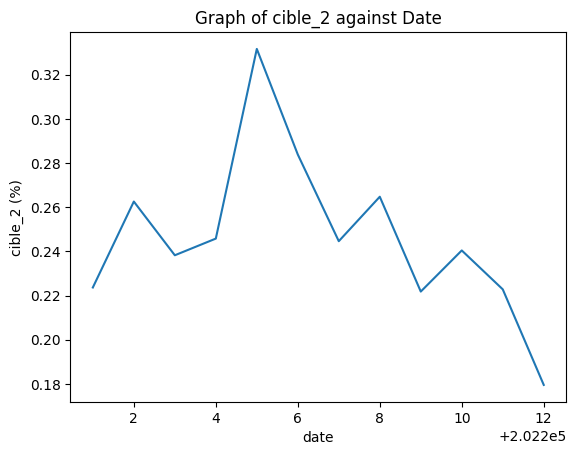

In [ ]:
import matplotlib.pyplot as plt

# Calculate the ratio cible_2/len(dataframe_sas)
df_graph_cible_date = dataframe_sas[['cible_2','date']]
df_graph_cible_date['cible_2'] = dataframe_sas['cible_2'].astype(int)

# Group by date
df_grouped = df_graph_cible_date.groupby('date').sum()

# Calculate the percentage
df_grouped['cible_2_percentage'] = df_grouped['cible_2'] / len(dataframe_sas) * 100

# Plot the graph
plt.plot(df_grouped.index, df_grouped['cible_2_percentage'])
plt.xlabel('date')
plt.ylabel('cible_2 (%)')
plt.title('Graph of cible_2 against Date')
plt.show()


On va étudier la corrélation entre la variable à expliquer et les variables explicatives.

In [ ]:
# Obtenez un résumé statistique des variables quantitatives sélectionnées
resume_statistique = dataframe_sas[list_variables_quantitatives].describe()

# Affichez le résumé statistique
print("Résumé statistique des variables quantitatives sélectionnées :")
print(resume_statistique)

Résumé statistique des variables quantitatives sélectionnées :
                date     NUMTECPRS  Engagement_prorat            AGE  \
count  596052.000000  5.960520e+05       5.960520e+05  176853.000000   
mean   202206.426891  6.665445e+10       8.869935e+04      49.527314   
std         3.452379  3.897724e+10       3.248812e+05      12.314475   
min    202201.000000  9.100000e+02       1.736364e-01      18.000000   
25%    202203.000000  3.119075e+10       3.057423e+03      40.000000   
50%    202206.000000  6.443075e+10       2.060360e+04      50.000000   
75%    202209.000000  9.929997e+10       7.278822e+04      59.000000   
max    202212.000000  1.343995e+11       4.007512e+07      97.000000   

            NBOPECAR  NBOPECARGLISS_M12      MNTOPECAR       NBPMTCAR  \
count  596045.000000      596045.000000  596045.000000  596045.000000   
mean       12.742118         147.837393    1322.520693      12.307728   
std        20.768327         217.954029    2709.186824      20.170003

On étudit maintenant les valeurs manquantes des variables.

Analyse des variables données:

In [3]:
list_var=['COULEUR_PART_M','CRTOD_CMT_IND_0036','LIBCSPCMP','NBJDEB_NA','PRORGL_FILLER_NUM07','SEC_DER']

In [4]:
df_6_vars=dataframe_sas[list_var]

In [ ]:
df_6_vars.head(10)

,COULEUR_PART_M,CRTOD_CMT_IND_0036,LIBCSPCMP,NBJDEB_NA,PRORGL_FILLER_NUM07,SEC_DER
0,Vert,0.0,COMMERCANTE,0.0,-1.0,Comm détail non alim
1,Vert,0.0,COMMERCANT,0.0,-1.0,Comm détail alim
2,Vert,0.0,CHIRURGIEN DENTISTE,0.0,-1.0,Pro lib santé
3,Vert,0.0,CHIRURGIEN DENTISTE,0.0,-1.0,Pro lib santé
4,Vert,0.0,MARCHAND AMBULANT,0.0,-1.0,Comm détail non alim
5,Vert,0.0,PHARMACIEN,11.0,-1.0,Pharmacie
6,Vert,0.0,ANTIQUAIRE,0.0,-1.0,Comm détail non alim
7,Orange,0.0,SANS PROFESSION,3.0,-1.0,Comm détail non alim
8,Orange,0.0,ARTISAN,0.0,-1.0,Comm détail non alim
9,Vert,0.0,ELECTRICIEN,0.0,-1.0,Artisan


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# Affiche le type de chaque variable
print("Types de variables :")
print(df_6_vars.dtypes)

Types de variables :
COULEUR_PART_M          object
CRTOD_CMT_IND_0036     float64
LIBCSPCMP               object
NBJDEB_NA              float64
PRORGL_FILLER_NUM07    float64
SEC_DER                 object
dtype: object


In [17]:
# Obtenez une liste des variables quantitatives
list_variables_quantitatives_6_vars = df_6_vars.select_dtypes(include=['number']).columns.tolist()

# Obtenez une liste des variables qualitatives
list_variables_qualitatives_6_vars = df_6_vars.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Obtenez le nombre de valeurs manquantes par variable
valeurs_manquantes_par_variable_6 = df_6_vars.isnull().sum()

# Affichez le nombre de valeurs manquantes devant le nom de chaque variable
for variable, manquants in valeurs_manquantes_par_variable_6.items():
    print(f"{variable}: {manquants} valeurs manquantes")

COULEUR_PART_M: 0 valeurs manquantes
CRTOD_CMT_IND_0036: 0 valeurs manquantes
LIBCSPCMP: 0 valeurs manquantes
NBJDEB_NA: 0 valeurs manquantes
PRORGL_FILLER_NUM07: 0 valeurs manquantes
SEC_DER: 0 valeurs manquantes


In [ ]:
import numpy as np

In [7]:
for column in df_6_vars.columns:
    unique_values = df_6_vars[column].unique()
    num_unique_values = len(unique_values)
    print(f"Unique values for {column}: {unique_values}")
    print(f"Number of unique values for {column}: {num_unique_values}")

Unique values for COULEUR_PART_M: ['Vert' 'Orange' 'NC' 'Rouge' 'NN']
Number of unique values for COULEUR_PART_M: 5
Unique values for CRTOD_CMT_IND_0036: [       0.  1960425.  2621478. ...  2348621.  2142609. -6950708.]
Number of unique values for CRTOD_CMT_IND_0036: 143732
Unique values for LIBCSPCMP: ['COMMERCANTE' 'COMMERCANT' 'CHIRURGIEN DENTISTE' ... 'PLIBERALE'
 'ASSISTANT MARKETING' 'VENTE A DISTANCE EN AUTOENTREPRE']
Number of unique values for LIBCSPCMP: 7492
Unique values for NBJDEB_NA: [ 0. 11.  3.  2.  8. 49. 32. 55. 18.  6.  9.  1. 13. 36. 10. 23. 63.  7.
 12. 24. 31. 48. 25.  5. 15. 38.  4. 88. 40. 66. 29. 44. 92. 87. 16. 21.
 56. 17. 28. 20. 14. 34. 83. 81. 27. 37. 30. 67. 46. 43. 62. 64. 65. 33.
 19. 45. 22. 82. 77. 47. 39. 52. 78. 86. 60. 90. 26. 42. 76. 79. 58. 53.
 69. 68. 41. 57. 51. 89. 50. 75. 61. 71. 80. 74. 35. 70. 72. 84. 54. 73.
 59. 85. 91.]
Number of unique values for NBJDEB_NA: 93
Unique values for PRORGL_FILLER_NUM07: [ -1. 576. 557. ... 875. 834. 854.]
Nu

In [ ]:
# Remplacez les valeurs 'NN' et 'NC' par NaN
df_6_vars.replace(['NN', 'NC'], np.nan, inplace=True)

# Calcule le nombre de valeurs manquantes par colonne
nb_valeurs_manquantes_par_colonne = df_6_vars.isnull().sum()

# Affiche le nombre de valeurs manquantes par colonne
print(nb_valeurs_manquantes_par_colonne)

COULEUR_PART_M         443252
CRTOD_CMT_IND_0036          0
LIBCSPCMP                   0
NBJDEB_NA                   0
PRORGL_FILLER_NUM07         0
SEC_DER                     0
dtype: int64


C:\Users\cedri\AppData\Local\Temp\ipykernel_12464\2386969423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_vars.replace(['NN', 'NC'], np.nan, inplace=True)


In [ ]:
print('la variables Couleur_part_m contient',df_6_vars['COULEUR_PART_M'].isnull().sum()/len(df_6_vars)*100,'% de valeurs manquantes')

la variables Couleur_part_m contient 74.36465274841792 % de valeurs manquantes


La variable COULEUR_PART_M contient 443252 valeurs manquantes on ne l'utilisera pas

Nous allons étudier les valeurs aberrantes et extrêmes des 6 variables

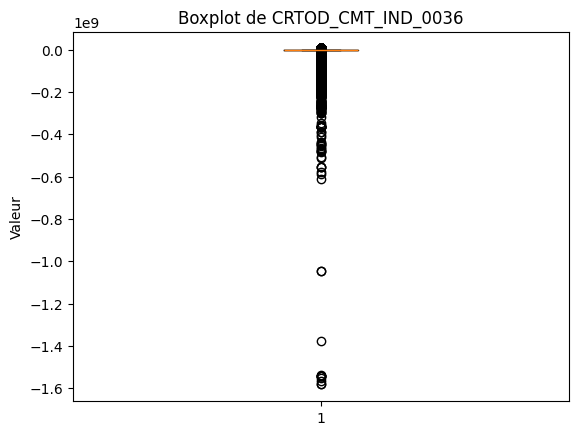

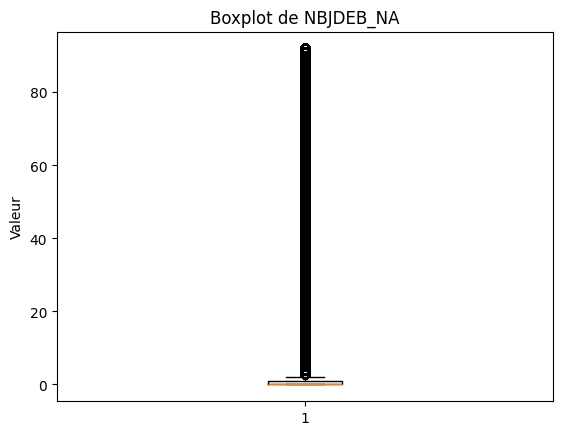

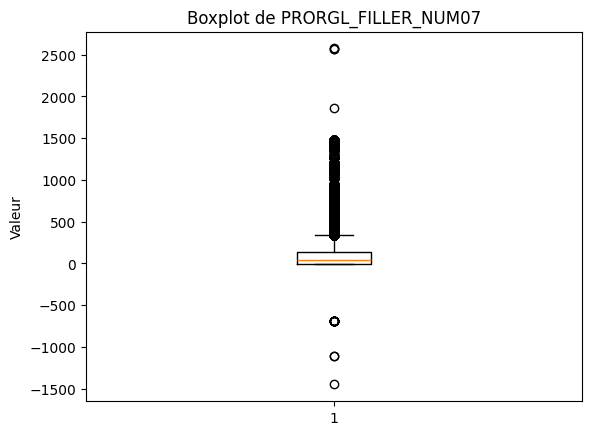

In [ ]:
import matplotlib.pyplot as plt

# Get the quantitative variables
quantitative_variables = df_6_vars.select_dtypes(include=['number']).columns.tolist()

# Create a boxplot for each variable
for variable in quantitative_variables:
    plt.boxplot(df_6_vars[variable])
    plt.title(f'Boxplot de {variable}')
    plt.ylabel('Valeur')
    plt.show()


In [ ]:
max(df_6_vars['CRTOD_CMT_IND_0036'])

5000000.0

In [ ]:
min(df_6_vars['CRTOD_CMT_IND_0036'])

-1581806625.0

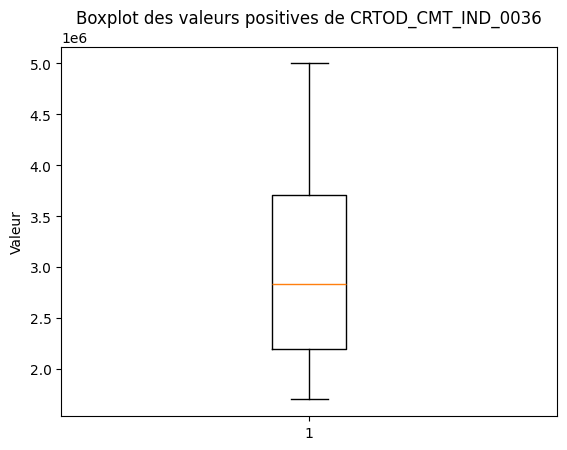

In [ ]:
# Filtrer les valeurs positives
positive_values = df_6_vars['CRTOD_CMT_IND_0036'][df_6_vars['CRTOD_CMT_IND_0036'] > 0]

# Crée un boxplot pour les valeurs positives
plt.boxplot(positive_values)
plt.title('Boxplot des valeurs positives de CRTOD_CMT_IND_0036')
plt.ylabel('Valeur')

# Affiche le boxplot
plt.show()

In [ ]:
# Calcule le pourcentage de valeurs négatives
percentage_negative = (df_6_vars['CRTOD_CMT_IND_0036'] < 0).mean() * 100

# Affiche le pourcentage de valeurs négatives
print(f"Pourcentage de valeurs négatives dans CRTOD_CMT_IND_0036 : {percentage_negative:.2f}%")

Pourcentage de valeurs négatives dans CRTOD_CMT_IND_0036 : 11.59%


In [ ]:
# Calcule le pourcentage de valeurs négatives
percentage_negative = (df_6_vars['CRTOD_CMT_IND_0036'] == 0).mean() * 100

# Affiche le pourcentage de valeurs négatives
print(f"Pourcentage de valeurs nulles dans CRTOD_CMT_IND_0036 : {percentage_negative:.2f}%")

Pourcentage de valeurs négatives dans CRTOD_CMT_IND_0036 : 73.80%


Variables inutilisables car quasiment tous les montants sont négatifs ou nul (informations concentré).

On étudie le libéllé des profession var : LIBCSPCMP

In [ ]:
# Comptez les occurrences de chaque catégorie
counts = df_6_vars['LIBCSPCMP'].value_counts()

print(counts)

LIBCSPCMP
                                    419753
CHIRURGIEN DENTISTE                  15014
ARTISANS SERVICES AUX PARTICULIE     10542
MEDECIN SPECIALISTE LIBERAL           9677
ARTISAN DU BATIMENT ET DES TRAVA      9031
                                     ...  
PROPRIETAIRE CHAMBRE D HOTES             1
CHAUFFEUR AMBASSADE                      1
NETTOYAGE INDUSTRIEL ET AU PARTI         1
MEDECIN LIBERAL ET SALARI                1
VENTE A DISTANCE EN AUTOENTREPRE         1
Name: count, Length: 7492, dtype: int64


In [ ]:
dataframe_sas['LIBCSPCMP'].nunique()

7492

In [ ]:
# Filtrer les libellés qui contiennent "LIBERAL"
filtered_data = df_6_vars[df_6_vars['LIBCSPCMP'].str.contains('MEDECIN')]

# Comptez les occurrences de chaque catégorie après le filtrage
counts = filtered_data['LIBCSPCMP'].value_counts()
print(counts)

LIBCSPCMP
MEDECIN SPECIALISTE LIBERAL        9677
MEDECIN GENERALISTE LIBERAL        5663
PSYCH... (NON MEDECIN)             2491
MEDECIN                            1942
MEDECIN GENERALISTE                1498
                                   ... 
MEDECIN ACUPUNCTEUR                   1
MEDECINE VASCULAIRE ANGIOLOGUE        1
MEDECIN INTERNE                       1
MEDECIN READAPTATION PHYSIQUE         1
THERAPEUTE EN MEDECINE CHINOISE       1
Name: count, Length: 155, dtype: int64


Etude secteur d'activité

In [ ]:
print(df_6_vars['SEC_DER'].unique())
print(df_6_vars['SEC_DER'].nunique())

['Comm détail non alim' 'Comm détail alim' 'Pro lib santé' 'Pharmacie'
 'Artisan' 'Agriculture' 'OBSL' 'Pro lib hors santé' 'Divers' 'BTP' 'CHR'
 'Immobilier' 'industrie fabrication' 'Comm Gros non alim' 'transport'
 'S C I' 'Viticulture' 'Comm Gros alim' 'non renseignes']
19


In [ ]:
# Obtenez le nombre d'observations par intitulé
observations_count = df_6_vars['SEC_DER'].value_counts()

# Affiche le résultat
print("Nombre d'observations par intitulé de SEC_DER :\n", observations_count)

Nombre d'observations par intitulé de SEC_DER :
 SEC_DER
Comm détail non alim     89925
Pro lib santé            83179
Artisan                  59221
Pro lib hors santé       56465
S C I                    50240
CHR                      50238
transport                33591
Divers                   29753
Comm détail alim         29175
Immobilier               22442
industrie fabrication    20763
OBSL                     20295
Comm Gros non alim       16961
BTP                      10552
non renseignes            6996
Agriculture               5485
Pharmacie                 4351
Comm Gros alim            4093
Viticulture               2327
Name: count, dtype: int64


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

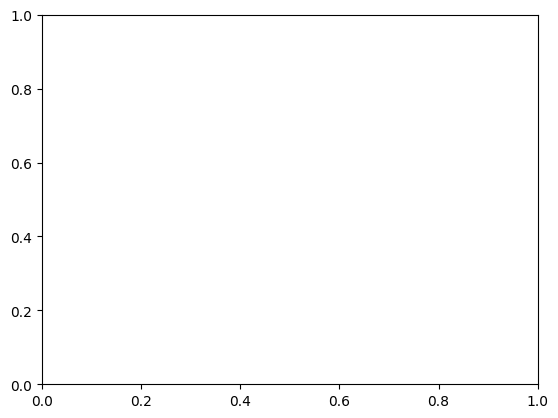

In [ ]:
# Créez un boxplot pour la variable SEC_DER
plt.boxplot(df_6_vars['SEC_DER'])
plt.title('Boxplot de la variable SEC_DER')
plt.ylabel('Valeur')

# Affiche le boxplot
plt.show()

la variables à 19 modalités on va devoir faire des regroupements.

In [ ]:
# Obtenez le nombre de valeurs manquantes par variable
valeurs_manquantes_par_variable = dataframe_sas.isna().sum()

# Triez les variables par nombre de valeurs manquantes (en ordre décroissant)
valeurs_manquantes_par_variable = valeurs_manquantes_par_variable.sort_values(ascending=False)

# Affichez le nombre de valeurs manquantes devant le nom de chaque variable
for variable, manquants in valeurs_manquantes_par_variable.items():
    print(f"{variable}: {manquants} valeurs manquantes")

AGE: 419199 valeurs manquantes
CATTCEUR_abs_mm12: 191799 valeurs manquantes
CATTCEUR_mm12: 191549 valeurs manquantes
CATTCEUR: 170471 valeurs manquantes
EVOL_NB_SALARIE: 135475 valeurs manquantes
NB_SALARIES_abs_mm12: 135475 valeurs manquantes
MNTPLV_rel_mm12: 133295 valeurs manquantes
MNTTOTMVTAFF_rel_mm12: 130673 valeurs manquantes
NB_SALARIES_mm12: 126230 valeurs manquantes
MNTPLV_rel_mm3: 98562 valeurs manquantes
NBECRCRD_rel_mm12: 98330 valeurs manquantes
MNTECRCRD_rel_mm12: 98330 valeurs manquantes
MNTTOTMVTAFF_rel_mm3: 97926 valeurs manquantes
CRTOC_IND_0164_rel_mm3: 96924 valeurs manquantes
MNTTOTMVTAFF_rel_mm1: 93350 valeurs manquantes
MNTPLV_rel_mm1: 92114 valeurs manquantes
NBECRDBT_rel_mm12: 68899 valeurs manquantes
MNTECRDBT_rel_mm12: 68899 valeurs manquantes
MNTECRCRD_rel_mm3: 61471 valeurs manquantes
NBECRCRD_rel_mm3: 61471 valeurs manquantes
MNTECRCRD_abs_mm12: 55984 valeurs manquantes
MNTPLV_abs_mm12: 55984 valeurs manquantes
NBPLV_abs_mm12: 55984 valeurs manquantes
NB

In [ ]:
# Comptez le nombre de lignes avec au moins une valeur manquante
nombre_lignes_avec_manquants = dataframe_sas.isna().any(axis=1).sum()

# Affichez le nombre de lignes avec au moins une valeur manquante
print("Nombre de lignes avec au moins une valeur manquante :", nombre_lignes_avec_manquants)

Nombre de lignes avec au moins une valeur manquante : 523142


In [ ]:
print('Nombre de lignes sans aucune valeur manquante :',len(dataframe_sas)-nombre_lignes_avec_manquants)

Nombre de lignes sans aucune valeur manquante : 72910


Nous allons maintenant étudier le lien entre la variable explicatives 'cible_2' et les variables à expliquer quantitatives.

On vérifie qu'il n'y est pas une variable qui ne prenne qu'une valeur

In [13]:
# Get the number of unique values for each variable
unique_value_counts = dataframe_sas.nunique()

# Sort the unique value counts in ascending order
unique_value_counts = unique_value_counts.sort_values()

# Display the variable names and their corresponding unique value counts
print("Number of unique values for each variable:")
print(unique_value_counts[unique_value_counts < 5])
print('il y a ', len(unique_value_counts[unique_value_counts < 5]), 'variables avec moins de 5 valeurs uniques')


Number of unique values for each variable:
NBJ_ARR                     1
Degra_IRPRO_continue_3dm    2
cible_2                     2
TOP_SCI                     2
Degra_IRPRO_1pt_par_2m      2
Degra_IRPRO_2pt_par_2m      2
cible_1                     2
cible_3                     2
IRPRO_rouge_3dm             2
INDRSKITDBDF                3
NDB_12dm                    3
COULEUR_IRPRO               3
CODTYPPRS                   3
NDB_3dm                     3
NDB_6dm                     3
COULEUR_IRPRO_mm1           4
INDDBLRLNPAR                4
Type_fdc_dm                 4
dtype: int64
il y a  18 variables avec moins de 5 valeurs uniques


In [14]:
# Get the variables with less than 5 unique values
variables_with_few_unique_values = unique_value_counts[unique_value_counts < 5].index.tolist()

# Display the different modalities for each variable
for variable in variables_with_few_unique_values:
    unique_values = dataframe_sas[variable].unique()
    print(f"Variable: {variable}")
    print(f"Modalities: {unique_values}")
    print()

Variable: NBJ_ARR
Modalities: [0.]

Variable: Degra_IRPRO_continue_3dm
Modalities: ['0' '1']

Variable: cible_2
Modalities: ['0' '1']

Variable: TOP_SCI
Modalities: ['0' '1']

Variable: Degra_IRPRO_1pt_par_2m
Modalities: ['0' '1']

Variable: Degra_IRPRO_2pt_par_2m
Modalities: ['0' '1']

Variable: cible_1
Modalities: ['0' '1']

Variable: cible_3
Modalities: ['0' '1']

Variable: IRPRO_rouge_3dm
Modalities: ['0' '1']

Variable: INDRSKITDBDF
Modalities: ['0' '1' '.']

Variable: NDB_12dm
Modalities: ['0' '1' '.']

Variable: COULEUR_IRPRO
Modalities: ['1' '2' '3']

Variable: CODTYPPRS
Modalities: ['EI' 'PM' '']

Variable: NDB_3dm
Modalities: ['0' '.' '1']

Variable: NDB_6dm
Modalities: ['0' '1' '.']

Variable: COULEUR_IRPRO_mm1
Modalities: ['1' '2' '3' '4']

Variable: INDDBLRLNPAR
Modalities: ['2' '0' '1' '.']

Variable: Type_fdc_dm
Modalities: ['4- Aucun FDC spécifique' '2- Réseau - Amiable' '3- Réseau - GDDS'
 '1- Recouvrement']



On remarque que NBJ_ARR n'a que 0 comme modalité donc elle ne sera pas utile pour notre analyse

on regarde l'évolution temporelle de variable en fonction de la variable cible

In [20]:
import pandas as pd

df_evolution_temp=df_6_vars

df_evolution_temp['cible_2'] = dataframe_sas['cible_2']

# Group the dataframe by 'cible_2' and calculate the statistics for each group
grouped_stats = df_evolution_temp.groupby('cible_2').describe()

# Select the relevant statistics for the quantitative variables
quantitative_stats = grouped_stats[list_variables_quantitatives_6_vars]

# Display the statistics
print(quantitative_stats)


C:\Users\cedri\AppData\Local\Temp\ipykernel_23672\3990781581.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evolution_temp['cible_2'] = dataframe_sas['cible_2']


        CRTOD_CMT_IND_0036                                                 \
                     count          mean           std           min  25%   
cible_2                                                                     
0                 578411.0 -1.506877e+06  1.145374e+07 -1.581807e+09  0.0   
1                  17641.0 -6.565311e+05  6.520811e+06 -3.900000e+08  0.0   

                             NBJDEB_NA             ...              \
         50%  75%        max     count       mean  ...   75%   max   
cible_2                                            ...               
0        0.0  0.0  5000000.0  578411.0   4.960151  ...   0.0  92.0   
1        0.0  0.0  5000000.0   17641.0  23.177031  ...  36.0  92.0   

        PRORGL_FILLER_NUM07                                                   \
                      count       mean         std     min  25%   50%    75%   
cible_2                                                                        
0                  5784

On  va créer les échantillon de train et de test

In [6]:
from sklearn.model_selection import train_test_split

# Split the dataframe into train and test samples
train_df, test_df = train_test_split(dataframe_sas, test_size=0.3, stratify=dataframe_sas['cible_2'], random_state=42)

# Print the shapes of the train and test samples
print("Train sample shape:", train_df.shape)
print("Test sample shape:", test_df.shape)


Train sample shape: (417236, 185)
Test sample shape: (178816, 185)


On vérifie que la stratification selon cible_2 a été bien réalisée

In [7]:
# Calculate the proportion of cible_2=1 in the train dataset
train_proportion = round(len(train_df[train_df['cible_2'] == '1']) / len(train_df)*100,3)

# Calculate the proportion of cible_2=1 in the test dataset
test_proportion = round(len(test_df[test_df['cible_2'] == '1']) / len(test_df)*100,3)

# Compare the proportions
if train_proportion == test_proportion:
    print("Train et Test ont tous les deux :", train_proportion,"% de défauts")
else:
    print("Train_df a : ", train_proportion, "% de défauts et test_df a : ", test_proportion, "% de défauts")

Train_df a :  2.96 % de défauts et test_df a :  2.959 % de défauts


La stratification a été respecté les deux échantillons ont environ 3% de défaut chacun.

On cherche la corréaltion ente la variable cible_2 et les variables quantitatives

In [39]:
import pandas as pd
from scipy.stats import kruskal


# Liste des variables quantitatives
list_variables_quantitatives = dataframe_sas.select_dtypes(include=['number']).columns.tolist()

# Création d'un DataFrame pour stocker les résultats
resultats_kruskall_wallis = pd.DataFrame(columns=['Variable', 'Stat. test Kruskall-Wallis', 'p-valeur'])

# Calcul des statistiques Kruskall-Wallis pour chaque variable
for variable in list_variables_quantitatives:
    # Exclure les groupes où toutes les valeurs sont identiques
    groupes = [dataframe_sas[variable][dataframe_sas['cible_2'] == groupe].dropna() for groupe in dataframe_sas['cible_2'].unique() if len(set(dataframe_sas[variable][dataframe_sas['cible_2'] == groupe])) > 1]
    
    if len(groupes) > 1:  # Assurez-vous qu'il y a au moins deux groupes
        stat, p_value = kruskal(*groupes)

        # Ajout des résultats au DataFrame
        resultats_kruskall_wallis = pd.concat([resultats_kruskall_wallis, pd.DataFrame({
            'Variable': [variable],
            'Stat. test Kruskall-Wallis': [stat],
            'p-valeur': [p_value]
        })], ignore_index=True)

# Tri du DataFrame par Stat. test Kruskall-Wallis en ordre décroissant
resultats_kruskall_wallis = resultats_kruskall_wallis.sort_values(by='Stat. test Kruskall-Wallis', ascending=False)

# Affichage du DataFrame
print(resultats_kruskall_wallis)


C:\Users\cedri\AppData\Local\Temp\ipykernel_20072\2709067845.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultats_kruskall_wallis = pd.concat([resultats_kruskall_wallis, pd.DataFrame({


               Variable  Stat. test Kruskall-Wallis  p-valeur
57          DEPASSEMENT                23351.717745  0.000000
80            NBJDEB_NA                23266.498384  0.000000
64      DEPASSEMENT_6dm                22690.400633  0.000000
77             NBJDEPDP                22414.087526  0.000000
65     DEPASSEMENT_12dm                21367.063038  0.000000
..                  ...                         ...       ...
82   CRTOD_CMT_IND_0036                    3.441486  0.063578
75        NB_RESTRU_6dm                    3.197428  0.073754
70            NB_RESTRU                    2.196790  0.138299
1             NUMTECPRS                    1.449456  0.228615
149   CATTCEUR_abs_mm12                    0.123231  0.725556

[152 rows x 3 columns]


In [44]:
# Sélectionner les 10 premières lignes
top_10_p_values = resultats_kruskall_wallis.head(10)

# Affichage du DataFrame des 10 plus petites p-valeurs
print(top_10_p_values)

                 Variable  Stat. test Kruskall-Wallis  p-valeur
57            DEPASSEMENT                23351.717745       0.0
80              NBJDEB_NA                23266.498384       0.0
64        DEPASSEMENT_6dm                22690.400633       0.0
77               NBJDEPDP                22414.087526       0.0
65       DEPASSEMENT_12dm                21367.063038       0.0
63        DEPASSEMENT_3dm                21114.424497       0.0
95        NBJDEB_IND_0015                16600.654374       0.0
68           NBJ_ARR_12dm                16336.328006       0.0
92  NB_MOIS_AVEC_ARR_12dm                16138.269317       0.0
85          NBJDEB_NA_mm3                15352.412003       0.0


On étudit la corrélation entre la variable cible et les variables qualitatives

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency

# Supposons que votre DataFrame s'appelle dataframe_sas
# et que vous avez déjà obtenu la liste des variables qualitatives

# Variable cible
cible = 'cible_2'

# Liste des variables qualitatives
list_variables_qualitatives = dataframe_sas.select_dtypes(include=['object']).columns.tolist()

# Création d'un DataFrame pour stocker les résultats
resultats_tests_qualitatifs = pd.DataFrame(columns=['Variable', 'Stat. du X2', 'p-valeur', 'V de Cramer', 'T de Tschupro'])

# Calcul des statistiques pour chaque variable qualitative
for variable in list_variables_qualitatives:
    if variable != cible:
        contingency_table = pd.crosstab(dataframe_sas[cible], dataframe_sas[variable])
        
        # Test du chi2_contingency
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        
        # Calcul du V de Cramer
        n = contingency_table.sum().sum()
        r, c = contingency_table.shape
        v_cramer = (chi2 / (n * (min(r, c) - 1)))**0.5
        
        # Calcul du T de Tschupro
        k1 = len(dataframe_sas[variable].unique())
        k2 = len(dataframe_sas[cible].unique())
        t_tschupro_max = ((min(k1 - 1, k2 - 1) / max(k1 - 1, k2 - 1))**(1/4))
        t_tschupro = (chi2 / (n * (k1 - 1) * (k2 - 1))**0.5)
        
        # Normalisation de T de Tschupro entre [1, T_max]
        t_tschupro_normalized = 1 + (t_tschupro_max - 1) * t_tschupro
        
        # Ajout des résultats au DataFrame
        resultats_tests_qualitatifs = pd.concat([resultats_tests_qualitatifs, pd.DataFrame({
            'Variable': [variable],
            'Stat. du X2': [chi2],
            'p-valeur': [p_value],
            'V de Cramer': [v_cramer],
            'T de Tschupro': [t_tschupro_normalized]
        })], ignore_index=True)

# Tri du DataFrame par V de Cramer du plus grand au plus petit
resultats_tests_qualitatifs = resultats_tests_qualitatifs.sort_values(by='V de Cramer')

# Affichage du DataFrame
print(resultats_tests_qualitatifs)


C:\Users\cedri\AppData\Local\Temp\ipykernel_20072\1391437200.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultats_tests_qualitatifs = pd.concat([resultats_tests_qualitatifs, pd.DataFrame({


                    Variable    Stat. du X2       p-valeur  V de Cramer  \
18    Degra_IRPRO_2pt_par_2m       7.635173   5.724090e-03     0.003579   
29                   TOP_SCI     113.380589   1.780899e-26     0.013792   
5                  CODTYPPRS     241.905375   2.957435e-53     0.020146   
17    Degra_IRPRO_1pt_par_2m     311.291342   1.142658e-69     0.022853   
23              INDDBLRLNPAR     550.327194  5.902088e-119     0.030386   
14                 CODACVPRO     973.044275  7.379578e-167     0.040404   
7                Type_fdc_dm    1420.637088  9.796318e-308     0.048820   
1                    SEC_DER    1839.865571   0.000000e+00     0.055559   
24              INDRSKITDBDF    1985.274665   0.000000e+00     0.057712   
28                   NDB_3dm    2060.166875   0.000000e+00     0.058791   
2             COULEUR_PART_M    2428.100536   0.000000e+00     0.063825   
3         COULEUR_PART_MM3_M    2715.913254   0.000000e+00     0.067502   
19  Degra_IRPRO_continue_

In [19]:
# Sélectionner les 10 premières lignes
top_10_quali_values = resultats_tests_qualitatifs.head(10)

# Affichage du DataFrame des 10 plus petites p-valeurs
print(top_10_quali_values)

                  Variable  Stat. du X2       p-valeur  V de Cramer  \
18  Degra_IRPRO_2pt_par_2m     7.635173   5.724090e-03     0.003579   
29                 TOP_SCI   113.380589   1.780899e-26     0.013792   
5                CODTYPPRS   241.905375   2.957435e-53     0.020146   
17  Degra_IRPRO_1pt_par_2m   311.291342   1.142658e-69     0.022853   
23            INDDBLRLNPAR   550.327194  5.902088e-119     0.030386   
14               CODACVPRO   973.044275  7.379578e-167     0.040404   
7              Type_fdc_dm  1420.637088  9.796318e-308     0.048820   
1                  SEC_DER  1839.865571   0.000000e+00     0.055559   
24            INDRSKITDBDF  1985.274665   0.000000e+00     0.057712   
28                 NDB_3dm  2060.166875   0.000000e+00     0.058791   

    T de Tschupro  
18       1.000000  
29       1.000000  
5        0.964749  
17       1.000000  
23       0.901161  
14       0.893818  
7        0.744854  
1        0.710999  
24       0.710703  
28       0.699790 

On va vérifier la dépendance entre les 10 variables quanti et les 10 variables quali les plus corrélé à cible_2

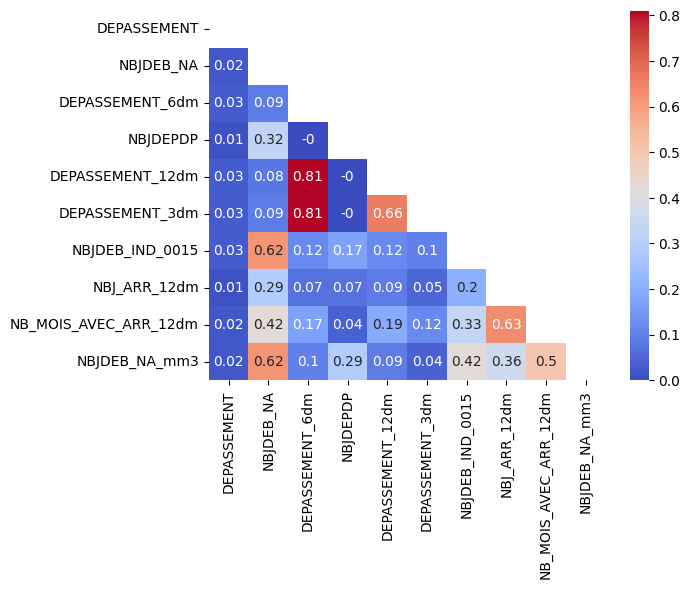

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select the variables from top_10_p_values
variables = top_10_p_values['Variable'].tolist()

# Create a cross-tabulation of the selected variables
cross_tab = dataframe_sas[variables].corr().round(2)

mask = np.triu(np.ones_like(cross_tab, dtype=bool))

# Create a heatmap of the cross-tabulation
sns.heatmap(cross_tab, annot=True, cmap='coolwarm',mask=mask)

# Display the plot
plt.show()


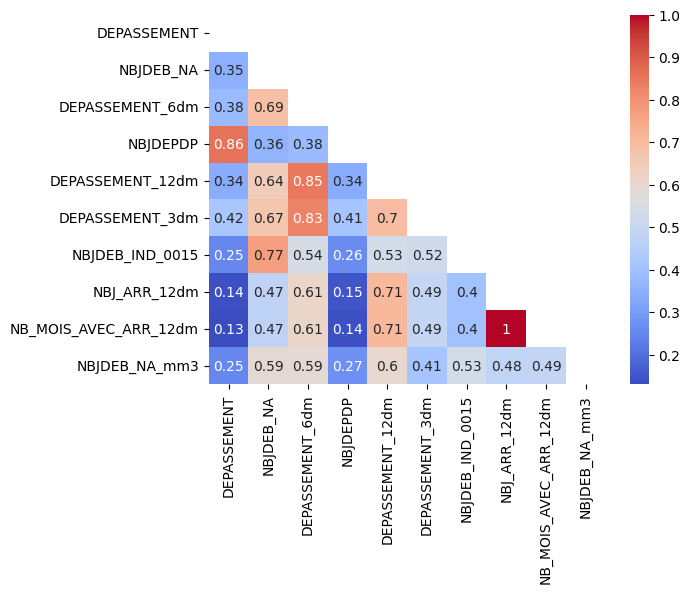

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select the variables from top_10_p_values
variables = top_10_p_values['Variable'].tolist()

# Create a cross-tabulation of the selected variables
cross_tab = dataframe_sas[variables].corr(method='spearman').round(2)

mask = np.triu(np.ones_like(cross_tab, dtype=bool))

# Create a heatmap of the cross-tabulation
sns.heatmap(cross_tab, annot=True, cmap='coolwarm',mask=mask)

# Display the plot
plt.show()


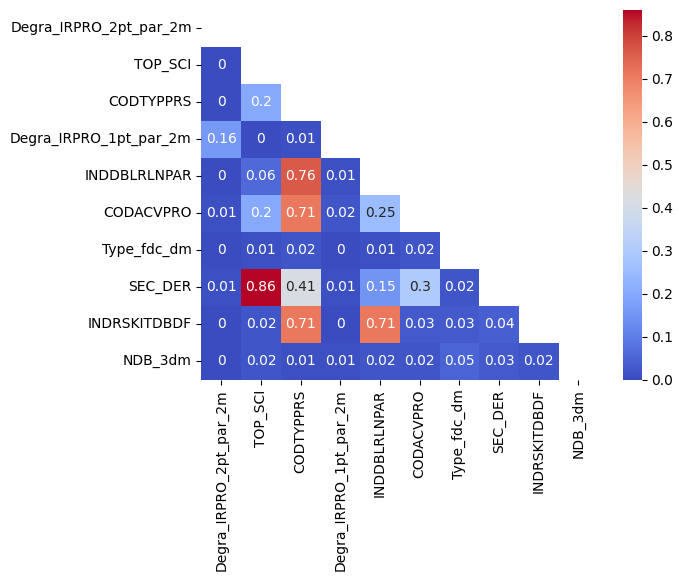

In [38]:
# Select the variables from top_10_quali_values
variables = top_10_quali_values['Variable'].tolist()

# Create an empty DataFrame to store the cross-tabulation results
cramer_table = pd.DataFrame(index=variables, columns=variables)

# Calculate the Cramer's V for each pair of variables
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            contingency_table = pd.crosstab(dataframe_sas[var1], dataframe_sas[var2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            r, c = contingency_table.shape
            v_cramer = round((chi2 / (n * (min(r, c) - 1)))**0.5,2)
            cramer_table.loc[var1, var2] = v_cramer

# Display the cross-tabulation table
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cramer_table = cramer_table.apply(pd.to_numeric, errors='coerce')

mask = np.triu(np.ones_like(cross_tab, dtype=bool))

# Create a heatmap of the cross-tabulation
sns.heatmap(cramer_table, annot=True, cmap='coolwarm',mask=mask)

# Display the plot
plt.show()